# Presentazione del database di riferimento

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carica il file CSV
file_path = 'C:/Users/Utente/Desktop/Università/AVRC/song_data.csv'
pd.set_option('display.max_rows', None)
data = pd.read_csv(file_path, encoding='latin1')

# Visualizza le prime righe del DataFrame
print(data.to_markdown())

|     |   year |   semi_final |   semi_draw_position |   final_draw_position | country                | artist_name                                        | song_name                                     | language                                   | style       |   direct_qualifier_10 | gender   |   main_singers | age     | selection   | key      |   BPM |   energy |   danceability |   happiness | loudness   |   acousticness |   instrumentalness |   liveness |   speechiness | release_date   | key_change_10   |   backing_dancers |   backing_singers |   backing_instruments |   instrument_10 |   qualified_10 |   final_televote_points |   final_jury_points |   final_televote_votes |   final_jury_votes |   final_place |   final_total_points |   semi_place |   semi_televote_points |   semi_jury_points |   semi_total_points |   favourite_10 | race    |   host_10 |
|----:|-------:|-------------:|---------------------:|----------------------:|:-----------------------|:--------------------------

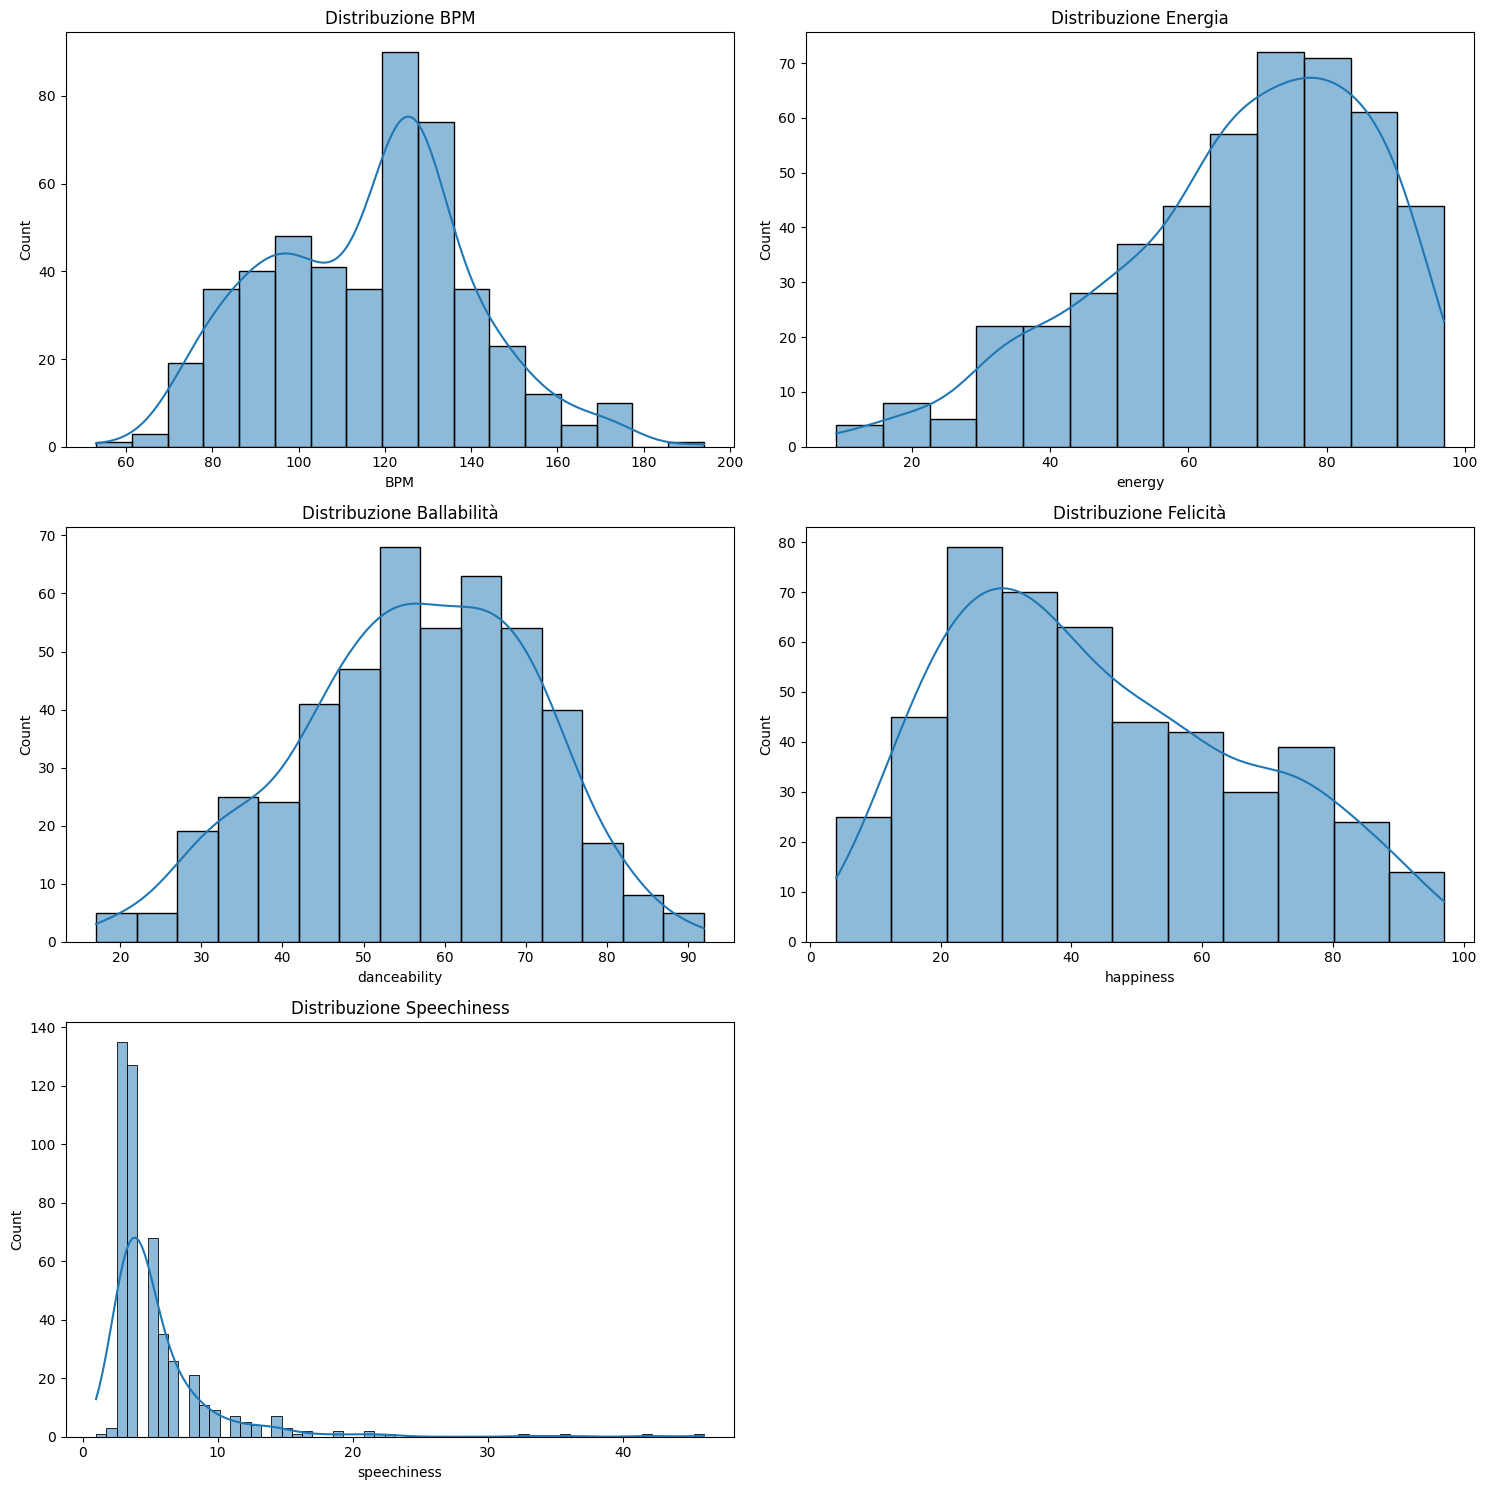

In [2]:
# Filtra le colonne di interesse
columns_of_interest = ['BPM', 'energy', 'danceability', 'happiness', 'speechiness']
data_filtered = data[columns_of_interest].dropna()

# Visualizza la distribuzione delle caratteristiche
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(data_filtered['BPM'], kde=True, ax=axs[0, 0]).set_title('Distribuzione BPM')
sns.histplot(data_filtered['energy'], kde=True, ax=axs[0, 1]).set_title('Distribuzione Energia')
sns.histplot(data_filtered['danceability'], kde=True, ax=axs[1, 0]).set_title('Distribuzione Ballabilità')
sns.histplot(data_filtered['happiness'], kde=True, ax=axs[1, 1]).set_title('Distribuzione Felicità')
sns.histplot(data_filtered['speechiness'], kde=True, ax=axs[2, 0]).set_title('Distribuzione Speechiness')

# Rimuove l'ultimo plot vuoto
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_16548\3058528496.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.values, y=language_counts.index, palette='viridis')


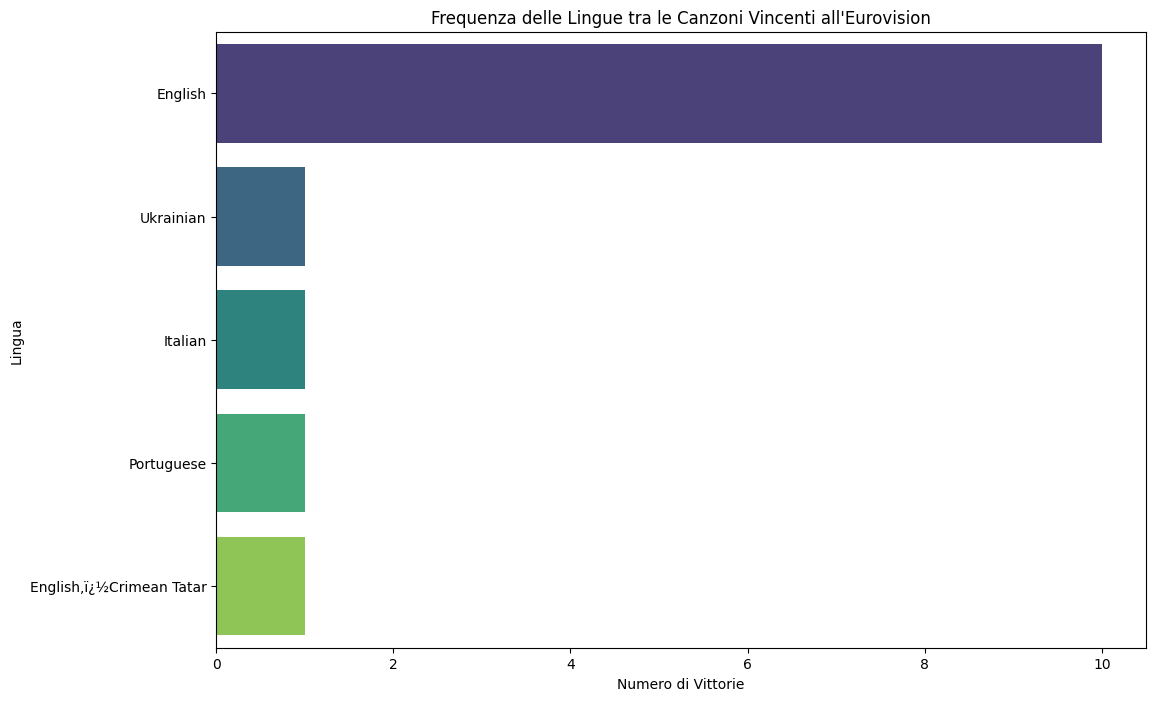

In [3]:
# Filtra le canzoni vincenti
winning_songs = data[data['final_place'] == 1]

# Conta la frequenza delle lingue tra le canzoni vincenti
language_counts = winning_songs['language'].value_counts()

# Visualizza la frequenza delle lingue
plt.figure(figsize=(12, 8))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='viridis')
plt.title('Frequenza delle Lingue tra le Canzoni Vincenti all\'Eurovision')
plt.xlabel('Numero di Vittorie')
plt.ylabel('Lingua')
plt.show()

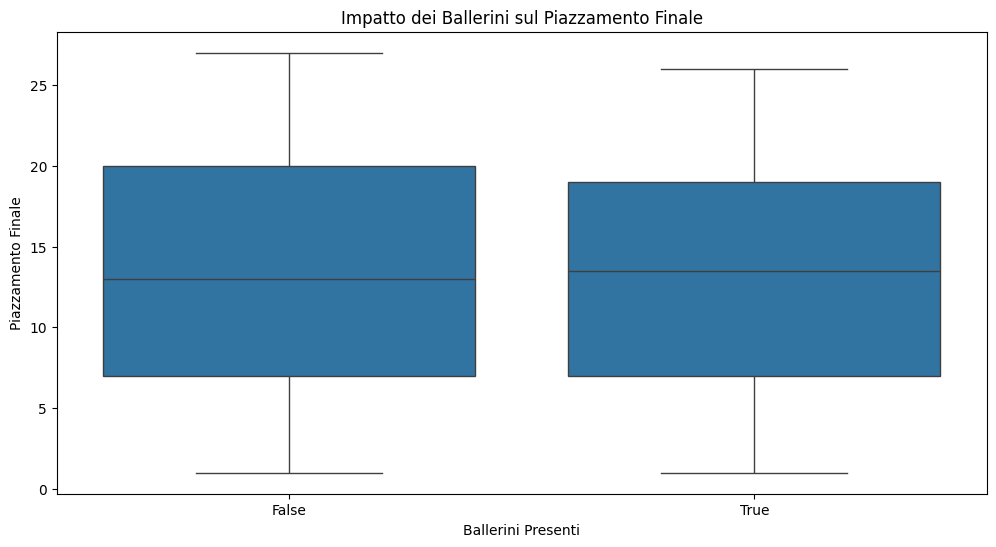

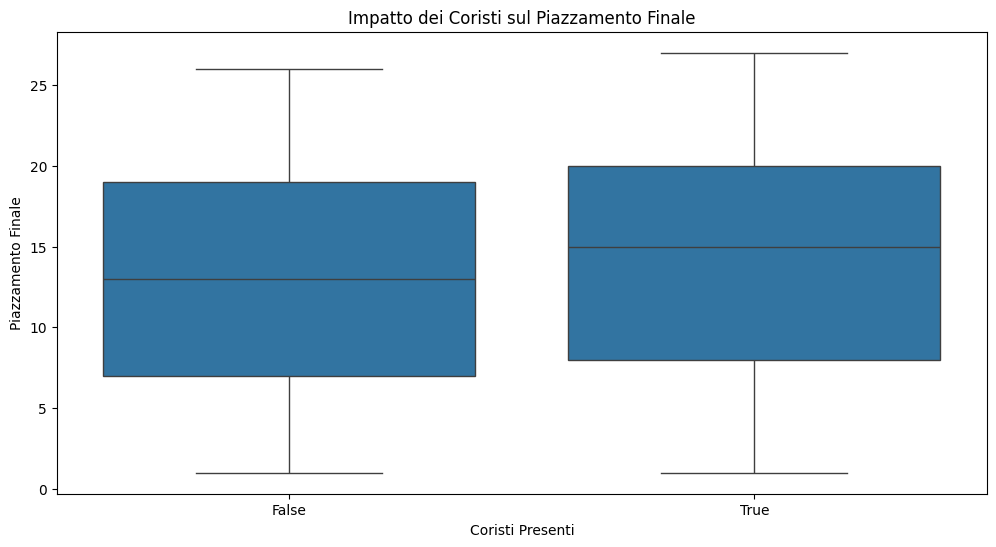

In [4]:
columns_of_interest = ['backing_dancers', 'backing_singers', 'final_place']
data_filtered = data[columns_of_interest].dropna()

# Converte le colonne in boolean per l'analisi
data_filtered['backing_dancers'] = data_filtered['backing_dancers'] > 0
data_filtered['backing_singers'] = data_filtered['backing_singers'] > 0

# Analizza l'impatto dei ballerini e dei coristi
plt.figure(figsize=(12, 6))
sns.boxplot(x='backing_dancers', y='final_place', data=data_filtered)
plt.title('Impatto dei Ballerini sul Piazzamento Finale')
plt.xlabel('Ballerini Presenti')
plt.ylabel('Piazzamento Finale')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='backing_singers', y='final_place', data=data_filtered)
plt.title('Impatto dei Coristi sul Piazzamento Finale')
plt.xlabel('Coristi Presenti')
plt.ylabel('Piazzamento Finale')
plt.show()

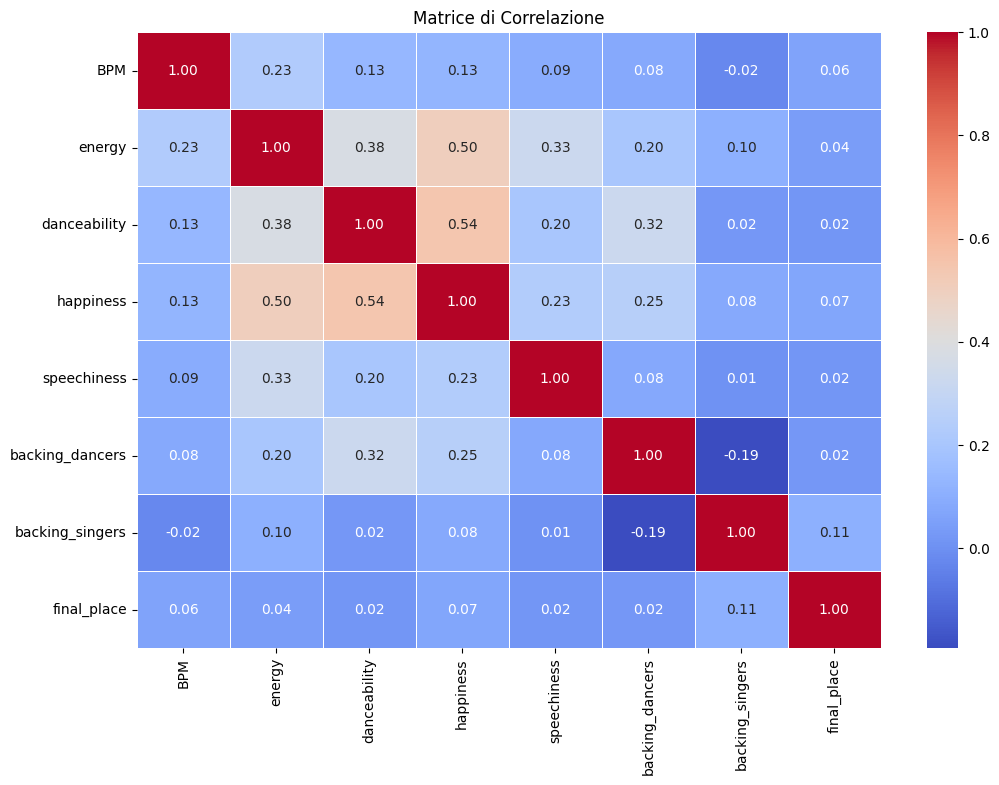

Correlazioni con final_place:
danceability       0.016388
speechiness        0.017740
backing_dancers    0.024699
energy             0.040454
BPM                0.057901
happiness          0.068972
backing_singers    0.105888
final_place        1.000000
Name: final_place, dtype: float64


In [5]:
columns_of_interest = ['BPM', 'energy', 'danceability', 'happiness', 'speechiness', 'backing_dancers', 'backing_singers', 'final_place']
data_filtered = data[columns_of_interest].dropna()

# Calcola la matrice di correlazione
correlation_matrix = data_filtered.corr()

# Visualizza la matrice di correlazione
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice di Correlazione')
plt.show()

# Mostra solo le correlazioni con final_place
final_place_corr = correlation_matrix['final_place'].sort_values()
print("Correlazioni con final_place:")
print(final_place_corr)

Accuratezza del modello: 0.95


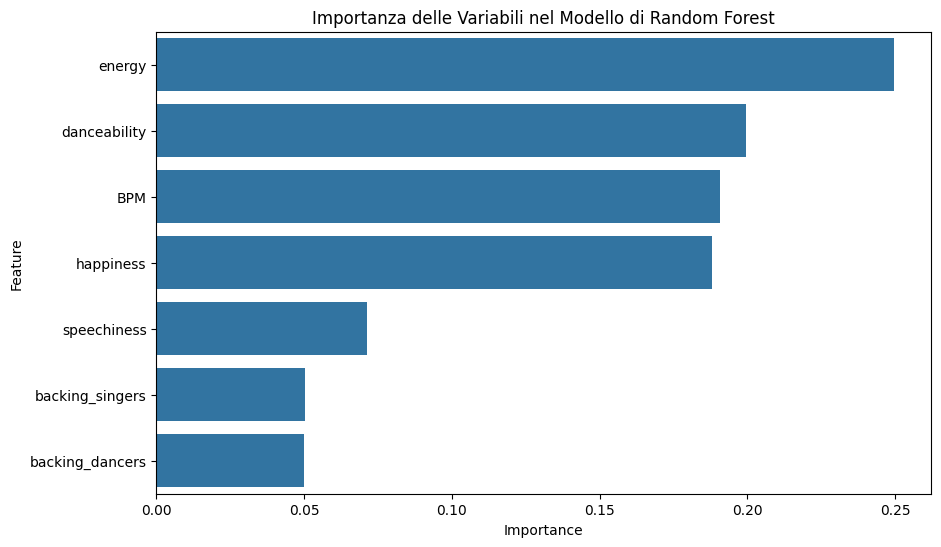

           Feature  Importance
1           energy    0.249783
2     danceability    0.199460
0              BPM    0.190830
3        happiness    0.188227
4      speechiness    0.071344
6  backing_singers    0.050347
5  backing_dancers    0.050009


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Prepara i dati per il modello
data_filtered['winner'] = data_filtered['final_place'] == 1
X = data_filtered[['BPM', 'energy', 'danceability', 'happiness', 'speechiness', 'backing_dancers', 'backing_singers']]
y = data_filtered['winner']

# Dividi i dati in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crea e addestra il modello di Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prevedi sul test set e calcola l'accuratezza
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuratezza del modello: {accuracy:.2f}')

# Estrai l'importanza delle variabili
feature_importances = rf.feature_importances_
features = X.columns

# Crea un dataframe per visualizzare l'importanza delle variabili
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizza l'importanza delle variabili
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importanza delle Variabili nel Modello di Random Forest')
plt.show()

print(importance_df)

C:\Users\Utente\AppData\Local\Temp\ipykernel_16548\3971098557.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_wins.values, y=artist_wins.index, palette='viridis')


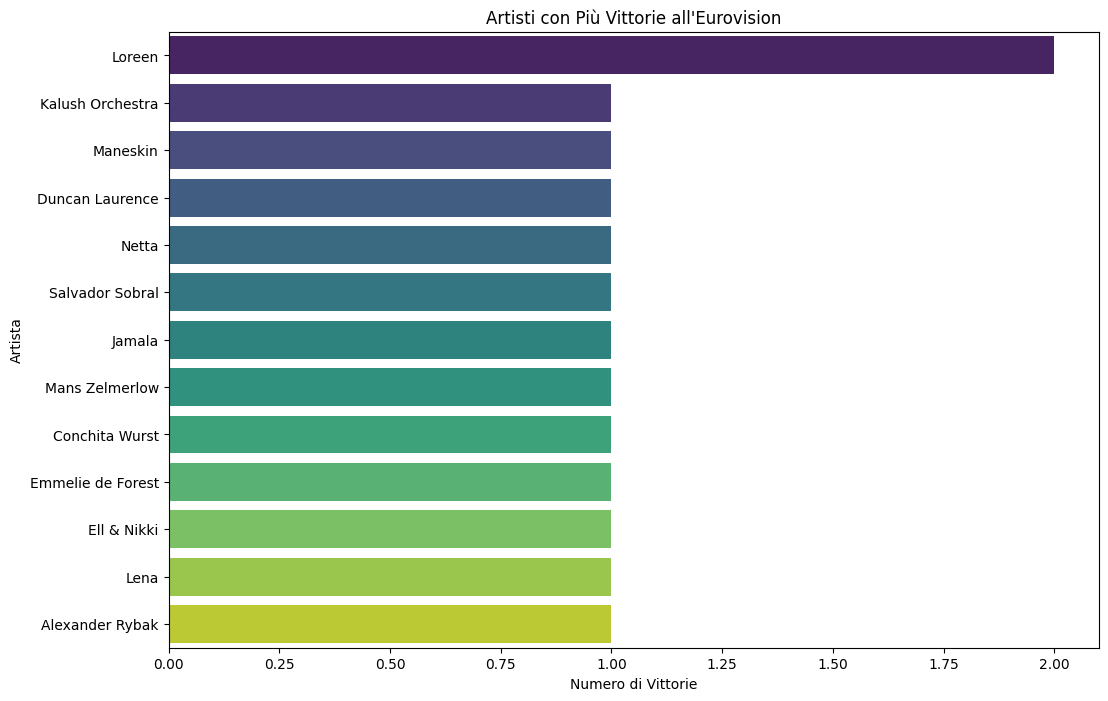

C:\Users\Utente\AppData\Local\Temp\ipykernel_16548\3971098557.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=artist_top_places.values, y=artist_top_places.index, palette='viridis')


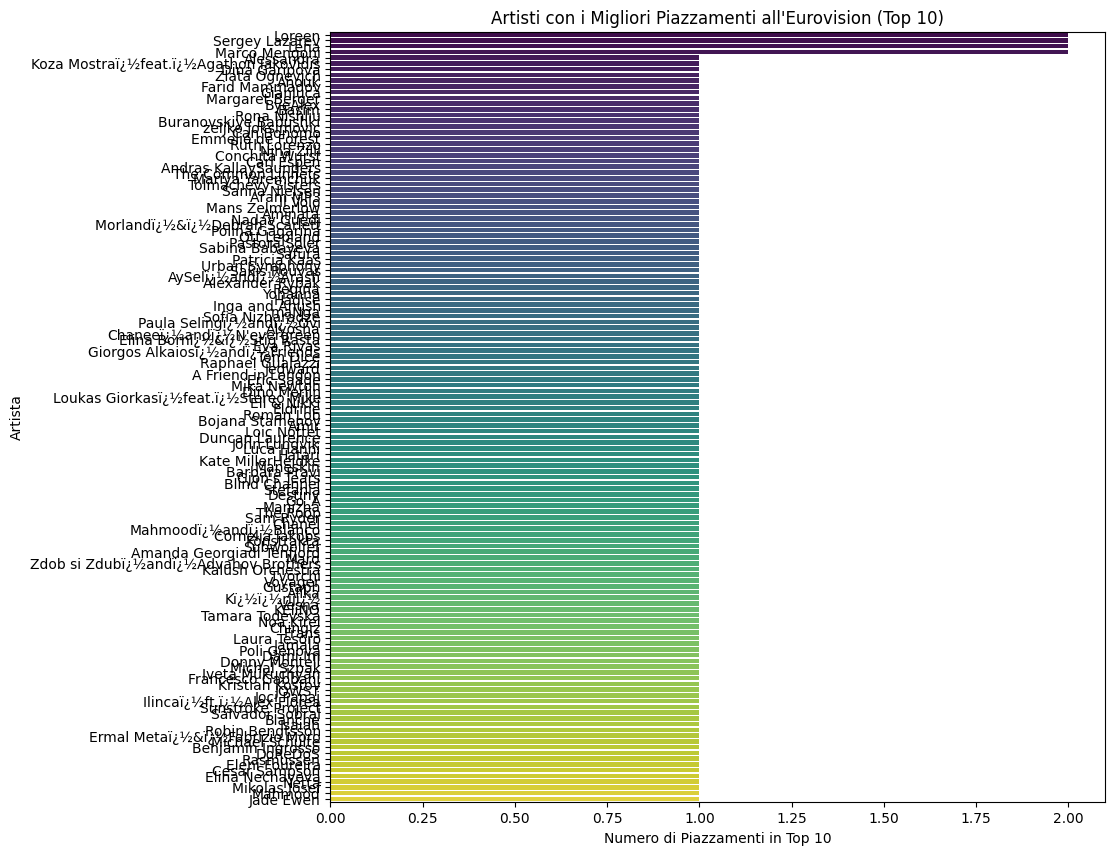

In [7]:
# Filtrare le canzoni vincenti
winning_songs = data[data['final_place'] == 1]

# Contare le vittorie per artista
artist_wins = winning_songs['artist_name'].value_counts()

# Visualizzare i risultati
plt.figure(figsize=(12, 8))
sns.barplot(x=artist_wins.values, y=artist_wins.index, palette='viridis')
plt.title('Artisti con Più Vittorie all\'Eurovision')
plt.xlabel('Numero di Vittorie')
plt.ylabel('Artista')
plt.show()

# Contare i piazzamenti finali migliori per artista
artist_top_places = data[data['final_place'] <= 10]['artist_name'].value_counts()

# Visualizzare i risultati
plt.figure(figsize=(10, 10))
sns.barplot(x=artist_top_places.values, y=artist_top_places.index, palette='viridis')
plt.title('Artisti con i Migliori Piazzamenti all\'Eurovision (Top 10)')
plt.xlabel('Numero di Piazzamenti in Top 10')
plt.ylabel('Artista')
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_16548\2359648059.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_top_places.values, y=country_top_places.index, palette='viridis')


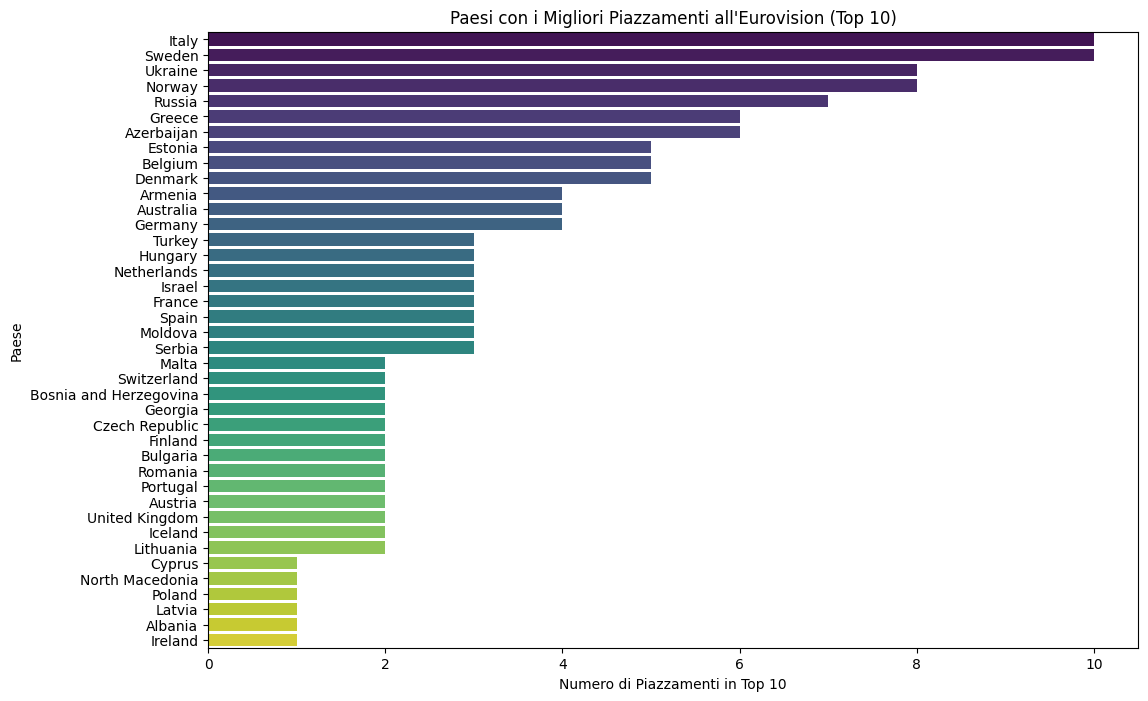

In [8]:
# Contare i piazzamenti finali migliori per paese
country_top_places = data[data['final_place'] <= 10]['country'].value_counts()

# Visualizzare i risultati
plt.figure(figsize=(12, 8))
sns.barplot(x=country_top_places.values, y=country_top_places.index, palette='viridis')
plt.title('Paesi con i Migliori Piazzamenti all\'Eurovision (Top 10)')
plt.xlabel('Numero di Piazzamenti in Top 10')
plt.ylabel('Paese')
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_16548\2490727604.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_mean_positions.values, y=country_mean_positions.index, palette='viridis')


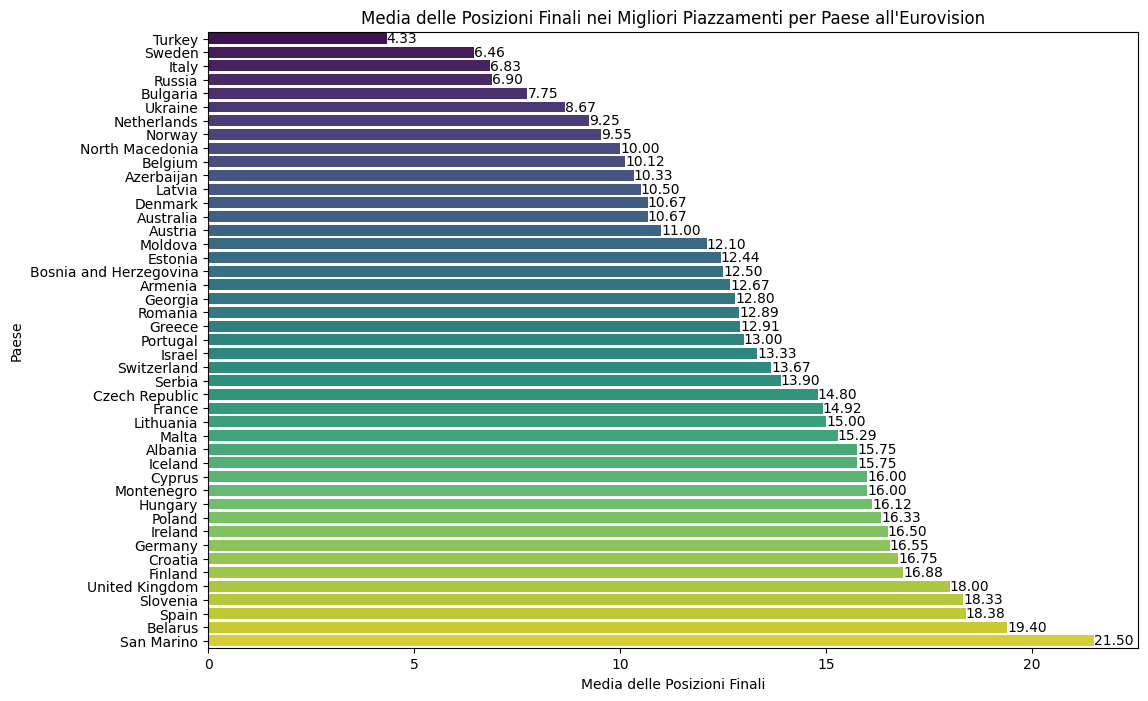

In [9]:
# Filtrare le canzoni che si sono piazzate tra le prime 10
top_10_songs = data[data['final_place'] <= 25]

# Calcolare la media delle posizioni finali per paese
country_mean_positions = top_10_songs.groupby('country')['final_place'].mean().sort_values()

# Visualizzare i risultati
plt.figure(figsize=(12, 8))
sns.barplot(x=country_mean_positions.values, y=country_mean_positions.index, palette='viridis')
# Aggiunta del valore della media al fondo di ogni barra
for index, value in enumerate(country_mean_positions.values):
    plt.text(value, index, f'{value:.2f}', color='black', va='center')
plt.title('Media delle Posizioni Finali nei Migliori Piazzamenti per Paese all\'Eurovision')
plt.xlabel('Media delle Posizioni Finali')
plt.ylabel('Paese')
plt.show()

C:\Users\Utente\AppData\Local\Temp\ipykernel_16548\2176388175.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Group', y='Mean Final Place', data=impact_data, palette='viridis')


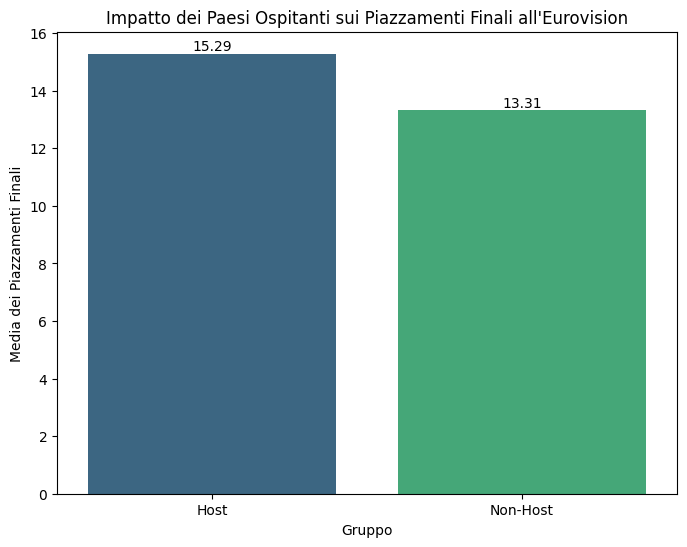

In [10]:
# Aggiungere una colonna che indica se il paese è ospitante
data['is_host'] = data['host_10'] == 1

# Calcolare la media delle posizioni finali per paesi ospitanti e non ospitanti
host_data = data[data['is_host'] == True]
non_host_data = data[data['is_host'] == False]

host_mean_position = host_data['final_place'].mean()
non_host_mean_position = non_host_data['final_place'].mean()

# Creare un DataFrame per visualizzare i risultati
impact_data = pd.DataFrame({
    'Group': ['Host', 'Non-Host'],
    'Mean Final Place': [host_mean_position, non_host_mean_position]
})

# Visualizzare i risultati
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Group', y='Mean Final Place', data=impact_data, palette='viridis')
# Aggiunta del valore della media al fondo di ogni barra
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.2f}', 
            ha='center', va='bottom', color='black')
plt.title('Impatto dei Paesi Ospitanti sui Piazzamenti Finali all\'Eurovision')
plt.xlabel('Gruppo')
plt.ylabel('Media dei Piazzamenti Finali')
plt.show()

-----------------------------------------------------------------------------------------

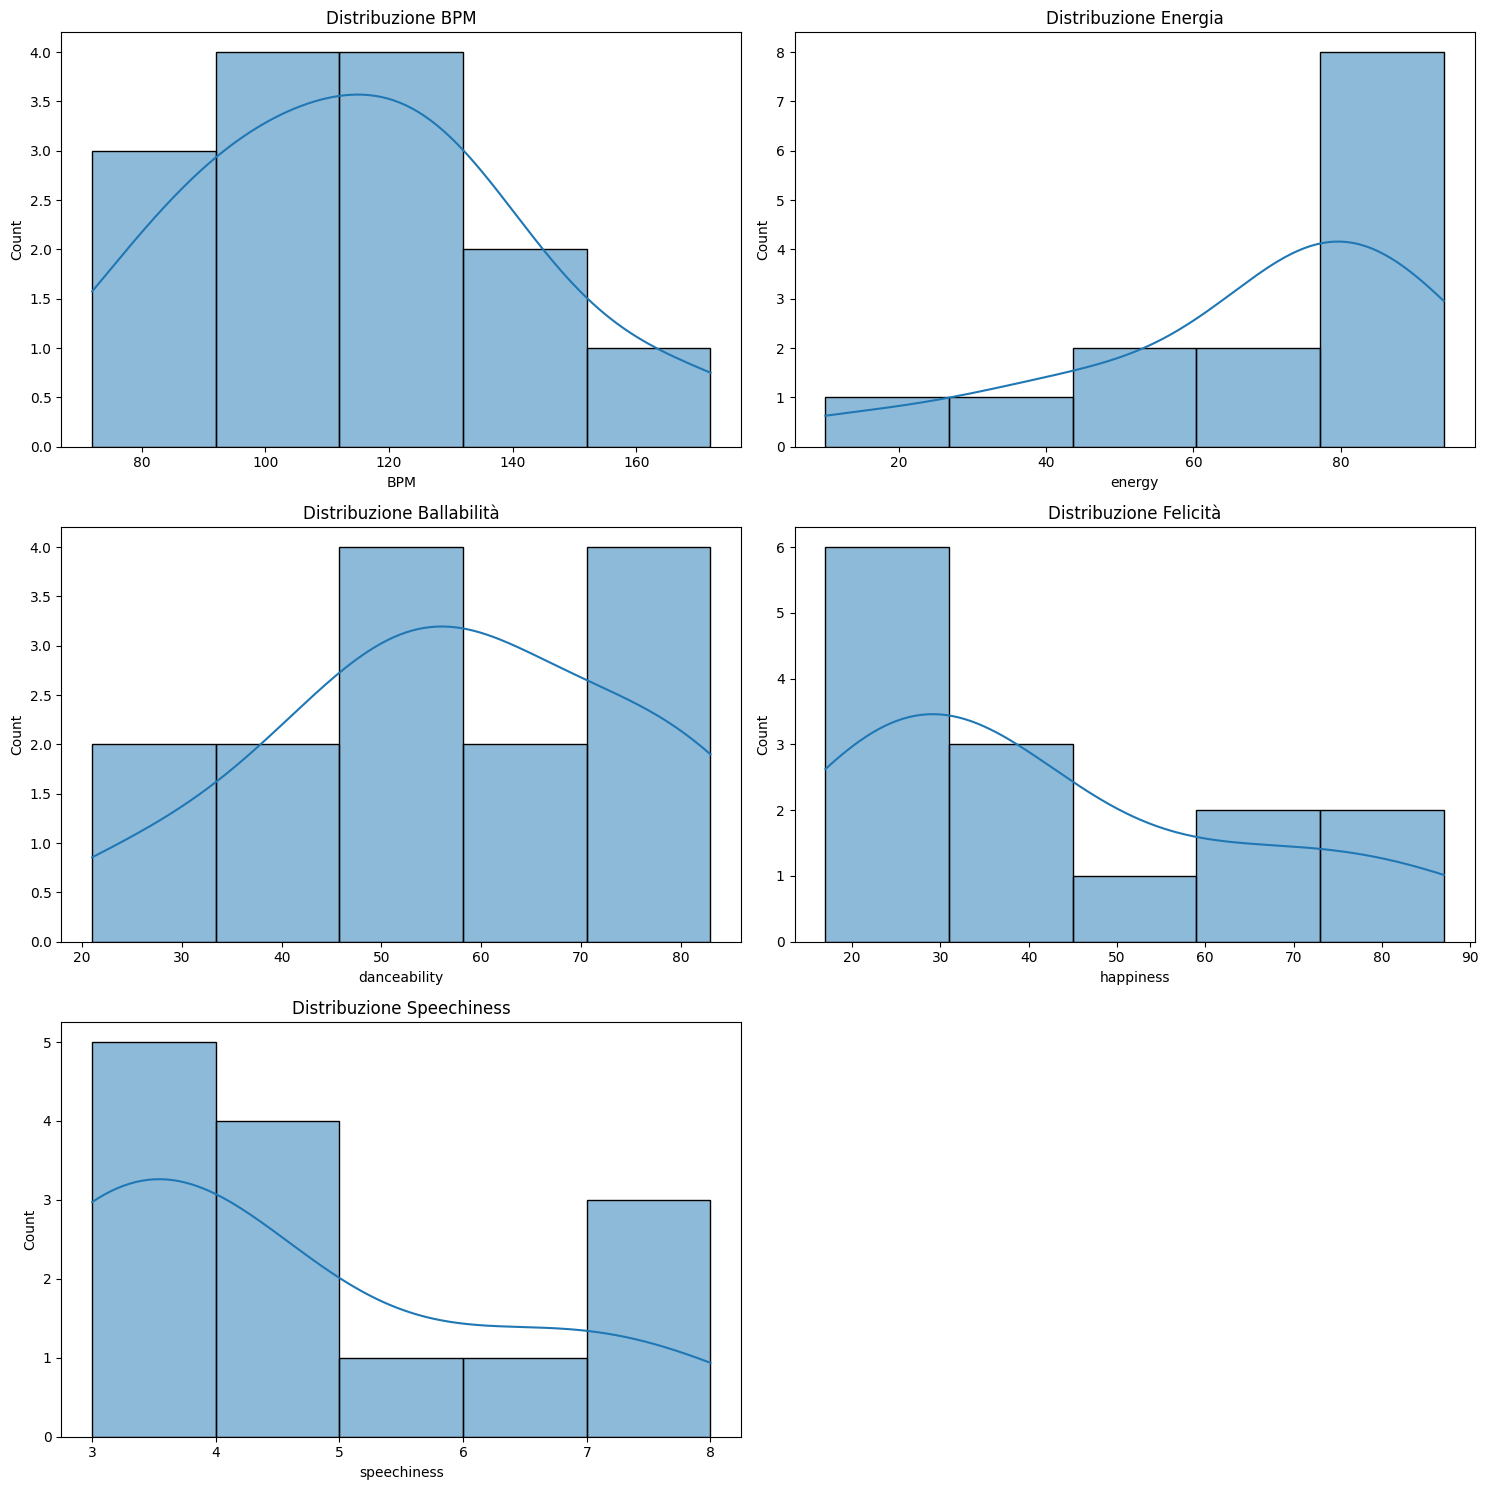

In [11]:
# Filtrare le canzoni vincenti
winning_songs = data[data['final_place'] == 1]

# Visualizza la distribuzione delle caratteristiche
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(winning_songs['BPM'], kde=True, ax=axs[0, 0]).set_title('Distribuzione BPM')
sns.histplot(winning_songs['energy'], kde=True, ax=axs[0, 1]).set_title('Distribuzione Energia')
sns.histplot(winning_songs['danceability'], kde=True, ax=axs[1, 0]).set_title('Distribuzione Ballabilità')
sns.histplot(winning_songs['happiness'], kde=True, ax=axs[1, 1]).set_title('Distribuzione Felicità')
sns.histplot(winning_songs['speechiness'], kde=True, ax=axs[2, 0]).set_title('Distribuzione Speechiness')

# Rimuove l'ultimo plot vuoto
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.show()
